# PROJET TECHNO DATA

## Auteurs

Rémi Mokrane

Aymen Zamoum

## Declaration librairies

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# show plots in the notebook
%matplotlib inline
import glob

## I - Analyse et Preparation des données

1. Etudier les données en affichants les informations correspondantes (colonnes, indice, etc) :

In [3]:
## TO DO
filenames = glob.glob('./bdd/caracteristiques-2017.csv')
print(filenames)
list_of_dfs = [pd.read_csv(filename, encoding="latin1") for filename in filenames]
df_caracteristiques = pd.concat(list_of_dfs, ignore_index=True)
df_caracteristiques.shape

['./bdd/caracteristiques-2017.csv']


(60701, 16)

In [4]:
filenames = glob.glob('./bdd/lieux-2017.csv')
print(filenames)
list_of_dfs = [pd.read_csv(filename, encoding="latin1") for filename in filenames]
df_lieux = pd.concat(list_of_dfs, ignore_index=True)
df_lieux.shape

['./bdd/lieux-2017.csv']


C:\Users\mimip\AppData\Local\Temp/ipykernel_14556/1916315995.py:3: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  list_of_dfs = [pd.read_csv(filename, encoding="latin1") for filename in filenames]


(60701, 18)

In [5]:
filenames = glob.glob('./bdd/usagers-2017.csv')
print(filenames)
list_of_dfs = [pd.read_csv(filename, encoding="latin1") for filename in filenames]
df_usagers = pd.concat(list_of_dfs, ignore_index=True)
df_usagers.shape

['./bdd/usagers-2017.csv']


(136021, 12)

In [6]:
filenames = glob.glob('./bdd/vehicules-2017.csv')
print(filenames)
list_of_dfs = [pd.read_csv(filename, encoding="latin1") for filename in filenames]
df_vehicules = pd.concat(list_of_dfs)
df_vehicules.shape

['./bdd/vehicules-2017.csv']


(103546, 9)

2. Fusionner les fichiers de donnés 

In [7]:
frames = [df_caracteristiques, df_lieux, df_usagers, df_vehicules]
accident_df = pd.concat(frames, axis=1)
base_acc_df = pd.concat(frames, axis=1) # used later to keep date related information which are removed from accident_df
print(accident_df.shape)



(136021, 55)


3. Nettoyer la base de données

Ex : Identifier le pourcentage de valeurs NaN dans la base et éliminez les colonnes où la majorité
des valeurs sont NaN.

In [8]:
perc = 50.0 # Like N %
min_count =  int(((100-perc)/100)*accident_df.shape[0] + 1)
accident_df = accident_df.dropna( axis=1, 
                thresh=min_count)
print(accident_df.shape)

accident_df = accident_df.loc[:,~accident_df.columns.duplicated()]

(136021, 21)


4. Supprimer les variables dont la majorité des observations sont manquantes

In [9]:
# Count number of zeros in all columns of Dataframe
for column_name in accident_df.columns:
    shape=accident_df.shape[0]
    column = accident_df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    pct=count/accident_df.shape[0]
    if(isinstance(pct, pd.Series)):
        print("Can't process Series...")
    elif(pct > 0.5):
        accident_df.drop([column_name], axis=1, inplace=True)
        print("Removing column ", column_name)

Removing column  locp
Removing column  actp
Removing column  etatp
Removing column  occutc
Removing column  obs


5. Remplir les valeurs NaN par différentes méthodes

In [10]:
def fill_nas_by_type(df, col_name):
    """Fill null values in df according to col_name type
    
    Parameters
    ----------
    df : dataframe, (default=None)
        input dataframe
    col_name : str, (default=None)
        column with null values to fill
        
    Returns
    -------
    df with filled values in col_name
    """
    if (col_name == "trajet"):
        df[col_name] = df[col_name].fillna(value=9)
    elif (col_name == "place"):
        df[col_name] = df[col_name].fillna(df[col_name].value_counts()[:1].index.tolist()[0])
    elif (col_name == "an_nais"):
        df[col_name] = df[col_name].fillna(float(df[col_name].median()))
    elif (col_name == "catv"):
        df[col_name] = df[col_name].fillna(value=99)
    elif (col_name == "obsm"):
        df[col_name] = df[col_name].fillna(value=99)
    elif (col_name == "choc"):
        df[col_name] = df[col_name].fillna(value=9)
    elif (col_name == "manv"):
        df[col_name] = df[col_name].fillna(value=25)
    elif (col_name == "senc"):
        df[col_name] = df[col_name].fillna(df[col_name].value_counts()[:1].index.tolist()[0])
    elif (col_name == "Num_Acc"):
        df[col_name] = df[col_name].fillna(method='ffill')
    elif (col_name == "secu"):
        df[col_name] = df[col_name].fillna(df[col_name].value_counts()[:1].index.tolist()[0])
    return df

for col in accident_df.columns:
    if(col == "num_veh"):
        accident_df.drop(col, inplace=True, axis=1)

cols_to_fill = list(accident_df.columns)

print(accident_df.isnull().sum(axis = 0))

print(accident_df.isnull().sum().sum())
for x in cols_to_fill:
    accident_df = fill_nas_by_type(accident_df, x)
print(accident_df.isnull().sum().sum())
print(accident_df.isnull().sum(axis = 0))

Num_Acc        0
place      11802
catu           0
grav           0
sexe           0
trajet        11
secu        8950
an_nais       37
senc       32543
catv       32475
obsm       32517
choc       32510
manv       32505
dtype: int64
183350
0
Num_Acc    0
place      0
catu       0
grav       0
sexe       0
trajet     0
secu       0
an_nais    0
senc       0
catv       0
obsm       0
choc       0
manv       0
dtype: int64


6. Analyser les données par les statistiques (min, max, médiane)

In [11]:
medians=accident_df.median()
print("medians of Each Column:")
print(medians)

mini=accident_df.min()
print("mins of Each Column:")
print(mini)

maxi=accident_df.max()
print("maxs of Each Column:")
print(maxi)

medians of Each Column:
Num_Acc    2.017000e+11
place      1.000000e+00
catu       1.000000e+00
grav       3.000000e+00
sexe       1.000000e+00
trajet     4.000000e+00
secu       1.100000e+01
an_nais    1.982000e+03
senc       1.000000e+00
catv       7.000000e+00
obsm       2.000000e+00
choc       3.000000e+00
manv       9.000000e+00
dtype: float64
mins of Each Column:
Num_Acc    2.017000e+11
place      1.000000e+00
catu       1.000000e+00
grav       1.000000e+00
sexe       1.000000e+00
trajet     0.000000e+00
secu       1.000000e+00
an_nais    1.914000e+03
senc       0.000000e+00
catv       1.000000e+00
obsm       0.000000e+00
choc       0.000000e+00
manv       0.000000e+00
dtype: float64
maxs of Each Column:
Num_Acc    2.017001e+11
place      9.000000e+00
catu       4.000000e+00
grav       4.000000e+00
sexe       2.000000e+00
trajet     9.000000e+00
secu       9.300000e+01
an_nais    2.017000e+03
senc       2.000000e+00
catv       9.900000e+01
obsm       9.900000e+01
choc       9.000

7. Expliquer la gravité des accidents en fonction des autres variables (créer une nouvelle variable "mortalité" qui indique si la victime est décédée ou non suite à l'accident : tué=1 non=0)

In [12]:
labels = [
    accident_df['grav'] == 1,
    accident_df['grav'] == 2,
    accident_df['grav'] == 3,
    accident_df['grav'] == 4,
]

outputs = [
    0,
    1,
    0,
    0,
]

accident_df['mortalite'] = np.select(labels, outputs)
print(accident_df['grav'].value_counts(normalize=True) * 100)
print(accident_df['mortalite'].value_counts(normalize=True) * 100)

print(accident_df.corr(method ='pearson')['mortalite'].sort_values(ascending=False))

1    41.368612
4    34.669647
3    21.315091
2     2.646650
Name: grav, dtype: float64
0    97.35335
1     2.64665
Name: mortalite, dtype: float64
mortalite    1.000000
secu         0.037220
catu         0.023449
trajet       0.020204
senc         0.001282
place       -0.005195
sexe        -0.035637
choc        -0.045022
manv        -0.049638
grav        -0.061069
obsm        -0.061198
catv        -0.061970
an_nais     -0.064513
Num_Acc     -0.093130
Name: mortalite, dtype: float64


## II - Visualisation et modélisation

C:\Users\mimip\AppData\Local\Temp/ipykernel_14556/3238255847.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['sexe'][:1] = "Men"
C:\Users\mimip\AppData\Local\Temp/ipykernel_14556/3238255847.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['sexe'][1:2] = "Women"


<AxesSubplot:xlabel='sexe', ylabel='percent'>

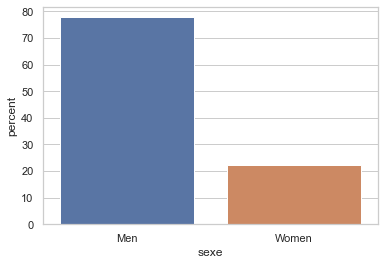

In [13]:
percentage = accident_df[accident_df['mortalite'] == 1]['sexe'].value_counts(normalize=True) * 100

sns.set_theme(style="whitegrid");
d = pd.DataFrame(columns=['percent', 'sexe'])
d['percent'] = percentage
d['sexe'][:1] = "Men"
d['sexe'][1:2] = "Women"
sns.barplot(x="sexe", y="percent", data=d)

### Mortality based on sex
men are more likely to die than women in car accident, we'll try to dig a bit deeper and find which other variables could increase the chance of dying.

         an_nais
1996.0  2.861111
1995.0  2.750000
1997.0  2.722222
1992.0  2.388889
1998.0  2.111111
...          ...
2010.0  0.111111
2009.0  0.083333
1923.0  0.055556
1921.0  0.055556
1920.0  0.027778

[98 rows x 1 columns]
        an_nais   percent
1996.0   1996.0  2.861111
1995.0   1995.0  2.750000
1997.0   1997.0  2.722222
1992.0   1992.0  2.388889
1998.0   1998.0  2.111111
...         ...       ...
2010.0   2010.0  0.111111
2009.0   2009.0  0.083333
1923.0   1923.0  0.055556
1921.0   1921.0  0.055556
1920.0   1920.0  0.027778

[98 rows x 2 columns]


<AxesSubplot:xlabel='an_nais', ylabel='percent'>

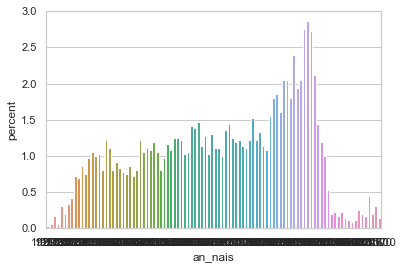

In [14]:
pct = accident_df[accident_df['mortalite'] == 1]['an_nais'].value_counts(normalize=True) * 100
print(pct.to_frame())

sns.set_theme(style="whitegrid");
a = pd.DataFrame(columns=['an_nais', 'mortalite'])
a['percent'] = pct
a['an_nais'] = a.index
a.reset_index()
a.drop(['mortalite'], axis=1, inplace=True)
print(a)
sns.barplot(x="an_nais", y="percent", data=a)

### Mortality based on age

Mortality based on age seems to quite logical based on the distribution of age (see below), some surmortality can be found on specific age range such as older population which has a high percentage representation in death while not being many present in the overall data set (meaning few old involved in car accident compared to the total)

1982.0
1978.3177965167142
        an_nais   percent
1997.0   1997.0  2.856912
1996.0   1996.0  2.728255
1995.0   1995.0  2.685615
1994.0   1994.0  2.580484
1998.0   1998.0  2.554753
...         ...       ...
1919.0   1919.0  0.008822
1918.0   1918.0  0.002941
1916.0   1916.0  0.001470
1917.0   1917.0  0.001470
1914.0   1914.0  0.000735

[103 rows x 2 columns]


<AxesSubplot:xlabel='an_nais', ylabel='percent'>

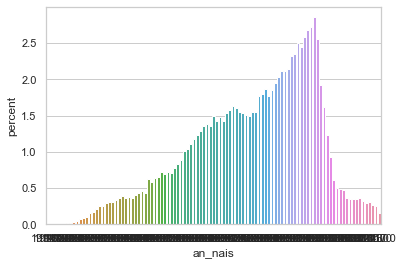

In [15]:
print(accident_df['an_nais'].median())
print(accident_df['an_nais'].mean())
pc = accident_df['an_nais'].value_counts(normalize=True) * 100

sns.set_theme(style="whitegrid");
b = pd.DataFrame(columns=['an_nais', 'pct'])
b['percent'] = pc
b['an_nais'] = b.index
b.reset_index()
b.drop(['pct'], axis=1, inplace=True)
print(b)
sns.barplot(x="an_nais", y="percent", data=b)

In [16]:
print(accident_df.head())

y = accident_df["mortalite"]
X = accident_df.drop('mortalite', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_train.shape)

        Num_Acc  place  catu  grav  sexe  trajet  secu  an_nais  senc  catv  \
0  201700000001    1.0     1     3     1     9.0  13.0   1968.0   0.0   7.0   
1  201700000001    2.0     2     3     2     9.0  11.0   1973.0   0.0  10.0   
2  201700000001    1.0     1     3     1     1.0  13.0   1967.0   0.0   7.0   
3  201700000002    1.0     1     1     1     0.0  11.0   1953.0   0.0   1.0   
4  201700000002    1.0     1     3     1     5.0  22.0   1960.0   0.0  10.0   

   obsm  choc  manv  mortalite  
0   2.0   3.0   9.0          0  
1   2.0   3.0  13.0          0  
2   0.0   1.0  16.0          0  
3   0.0   7.0   1.0          0  
4   2.0   1.0   1.0          0  
train shape (95214, 13) (95214,)
test shape (40807, 13) (95214,)


In [26]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline


regressor = LogisticRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics
n_scores = cross_val_score(regressor, X, y, scoring='accuracy', cv=5)
n_scores
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

C:\Users\mimip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mimip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Accuracy: 0.974 (0.000)


C:\Users\mimip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 257.44, 'Predicted label')

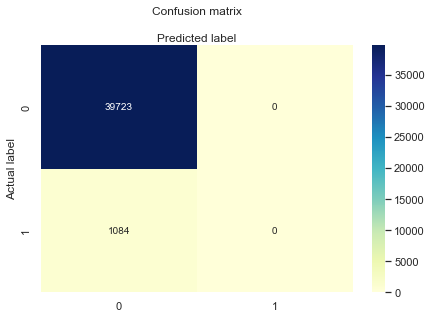

In [27]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     39723
           1       0.00      0.00      0.00      1084

    accuracy                           0.97     40807
   macro avg       0.49      0.50      0.49     40807
weighted avg       0.95      0.97      0.96     40807



C:\Users\mimip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mimip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mimip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1, max_depth=2)

# your code here
n_scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.974 (0.000)


We'll now try to rerun the models using normalized data, some data value differences can lead to some models error, thus normalizing the data can ensure less processing errors can be made.

In [30]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(accident_df)
df_normalized = pd.DataFrame(x_scaled)
print(accident_df.columns.tolist())
df_normalized.columns = accident_df.columns.tolist()
print(df_normalized)

['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'an_nais', 'senc', 'catv', 'obsm', 'choc', 'manv', 'mortalite']
         Num_Acc  place      catu      grav  sexe    trajet      secu  \
0       0.000000  0.000  0.000000  0.666667   0.0  1.000000  0.130435   
1       0.000000  0.125  0.333333  0.666667   1.0  1.000000  0.108696   
2       0.000000  0.000  0.000000  0.666667   0.0  0.111111  0.130435   
3       0.000016  0.000  0.000000  0.000000   0.0  0.000000  0.108696   
4       0.000016  0.000  0.000000  0.666667   0.0  0.555556  0.228261   
...          ...    ...       ...       ...   ...       ...       ...   
136016  0.999967  0.000  0.000000  0.000000   1.0  1.000000  0.108696   
136017  0.999984  0.000  0.000000  0.000000   1.0  1.000000  0.108696   
136018  0.999984  0.000  0.000000  1.000000   0.0  1.000000  0.217391   
136019  0.999984  0.125  0.333333  1.000000   1.0  1.000000  0.217391   
136020  1.000000  0.000  0.000000  1.000000   0.0  0.111111  0.217391 

In [31]:
y = df_normalized["mortalite"]
X = df_normalized.drop('mortalite', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_train.shape)

train shape (95214, 13) (95214,)
test shape (40807, 13) (95214,)


In [32]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1, max_depth=2)

# your code here
n_scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.974 (0.001)


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
GBC = GradientBoostingClassifier()
rfc=RandomForestClassifier(max_depth=7, n_estimators=500, random_state=42)
param_grid = { 
    'min_samples_leaf': [1, 4, 7],
    'min_samples_split': [2, 4, 6, 8, 10],
    'max_depth' : [2,3],
    'n_estimators' :[20, 30, 40]
}
clf_rf3 = GridSearchCV(estimator=rfc, param_grid=param_grid)


grid_GBC = GridSearchCV(estimator=rfc, param_grid = param_grid, cv = 5, n_jobs=-1)
grid_GBC.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBC.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

 The best score across ALL searched params:
 0.9735753146532321

 The best parameters across ALL searched params:
 {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
param_grid = { 
    'n_estimators': [500],
    'max_features': ['auto'],
    'max_depth' : [7],
    'criterion' :['gini']
}
clf_rf4 = GridSearchCV(estimator=clf, param_grid=param_grid)
n_scores = cross_val_score(clf_rf4, X, y, scoring='accuracy', cv=5)

print(n_scores.mean())

cl0 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
param_grid = { 
    'n_estimators': [100],
    'max_features': ['auto'],
    'max_depth' : [7],

}
clf_rf5 = GridSearchCV(estimator=cl0, param_grid=param_grid)
n_scores = cross_val_score(clf_rf5, X, y, scoring='accuracy', cv=5)

print(n_scores.mean())

0.9789589766210851
0.8056313177724682


In [36]:
print(df_normalized.corr(method ='pearson')['mortalite'].sort_values(ascending=False))

mortalite    1.000000
secu         0.037220
catu         0.023449
trajet       0.020204
senc         0.001282
place       -0.005195
sexe        -0.035637
choc        -0.045022
manv        -0.049638
grav        -0.061069
obsm        -0.061198
catv        -0.061970
an_nais     -0.064513
Num_Acc     -0.093130
Name: mortalite, dtype: float64


### Accident based on time information
We will now try to understand what information can time give us relating to accident frequency and accident gravity.


        an  percent
17.0  17.0    100.0


C:\Users\mimip\AppData\Local\Temp/ipykernel_14556/1539604272.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['mortalite'] = np.select(labels, outputs)


<AxesSubplot:xlabel='an', ylabel='percent'>

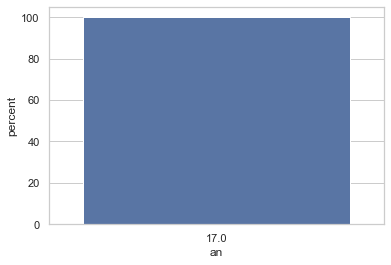

In [50]:
selected_rows = base_acc_df[~base_acc_df['an'].isnull()]

labels = [
    selected_rows['grav'] == 1,
    selected_rows['grav'] == 2,
    selected_rows['grav'] == 3,
    selected_rows['grav'] == 4,
]

outputs = [
    0,
    1,
    0,
    0,
]

selected_rows['mortalite'] = np.select(labels, outputs)

pct_an = selected_rows['an'].value_counts(normalize=True) * 100

sns.set_theme(style="whitegrid");
c = pd.DataFrame(columns=['an', 'pct'])
c['percent'] = pct_an
c['an'] = c.index
c.reset_index()
c.drop(['pct'], axis=1, inplace=True)
print(c)
sns.barplot(x="an", y="percent", data=c)

<AxesSubplot:xlabel='mois', ylabel='percent'>

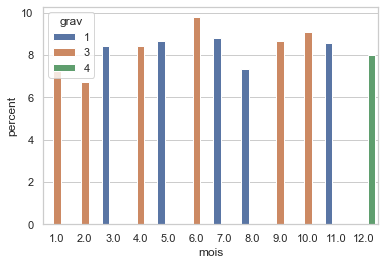

In [62]:
pct_mois = selected_rows['mois'].value_counts(normalize=True) * 100
mort = selected_rows['grav']

sns.set_theme(style="whitegrid");
d = pd.DataFrame(columns=['mois', 'pct','grav'])
d['percent'] = pct_mois
d['mois'] = d.index
d['grav'] = mort
d.reset_index()
d.drop(['pct'], axis=1, inplace=True)
sns.barplot(x="mois", y="percent", hue="grav", data=d)

Regarding accident/months, June has the highest numbers of accidents as well as most of them being dangerous (deadly/dangerous)
The safest month is august, being mostly non harming accident, as well as a low amount of accident. Might be the result of having low density circulation in this month.

<AxesSubplot:xlabel='hrmn', ylabel='percent'>

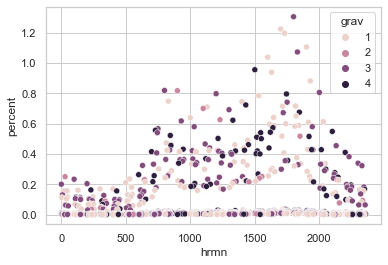

In [67]:
pct_heure = selected_rows['hrmn'].value_counts(normalize=True) * 100
mort = selected_rows['grav']

sns.set_theme(style="whitegrid");
e = pd.DataFrame(columns=['hrmn', 'pct','grav'])
e['percent'] = pct_heure
e['hrmn'] = e.index
e['grav'] = mort
e.reset_index()
e.drop(['pct'], axis=1, inplace=True)
sns.scatterplot(x="hrmn", y="percent", hue="grav", data=e)

In [ ]:
Nb of accident based on our seems to overlap with road usage throughout the day, 